<a href="https://colab.research.google.com/github/M4ZUTA/Game-Developer-4602/blob/main/Gauss_Law_Analisis_medan_listrik_pada_jantung_manusia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Converged after 829 iterations


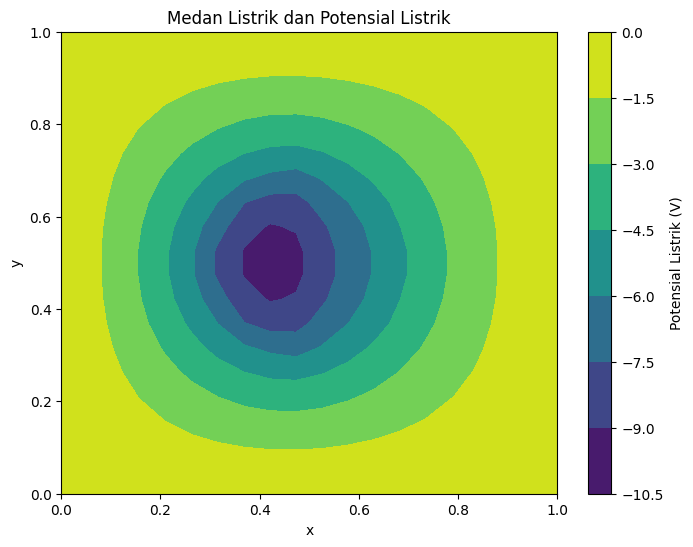

In [ ]:
# Pertama, pastikan Anda telah menginstal paket-paket yang diperlukan
!pip install numpy matplotlib

import numpy as np
import matplotlib.pyplot as plt

# Definisi geometri jantung
heart_geometry = np.array([
    [0, 0],
    [1, 0],
    [1, 1],
    [0, 1],
    [0.5, 0.5],  # Posisi ventrikel kiri
])

# Definisi mesh
nx, ny = 20, 20
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
xx, yy = np.meshgrid(x, y)

# Definisi fungsi sumber (aktivitas listrik jantung)
def source_function(x, y):
    if np.sqrt((x - 0.5)**2 + (y - 0.5)**2) < 0.2:  # Ventrikel kiri
        return 100
    else:
        return 0

source = np.vectorize(source_function)(xx, yy)

# Definisi konduktivitas jaringan jantung
sigma = np.ones((nx, ny))
sigma[xx < 0.5] = 0.2  # Ventrikel kiri dengan konduktivitas lebih rendah

# Penyelesaian persamaan Poisson menggunakan metode perbedaan hingga
phi = np.zeros_like(xx)

# Parameter
dx = x[1] - x[0]
dy = y[1] - y[0]
tolerance = 1e-5
max_iter = 10000

for it in range(max_iter):
    phi_new = np.copy(phi)
    phi_new[1:-1, 1:-1] = (
        (phi[2:, 1:-1] + phi[:-2, 1:-1]) * dy**2 +
        (phi[1:-1, 2:] + phi[1:-1, :-2]) * dx**2 -
        source[1:-1, 1:-1] * dx**2 * dy**2 / sigma[1:-1, 1:-1]
    ) / (2 * (dx**2 + dy**2))

    if np.linalg.norm(phi_new - phi) < tolerance:
        print(f"Converged after {it} iterations")
        break

    phi = phi_new

# Visualisasi medan listrik
Ex, Ey = np.gradient(-phi, dx, dy)

plt.figure(figsize=(8, 6))
plt.quiver(xx, yy, Ex, Ey, scale=50)
plt.contourf(xx, yy, phi, cmap='viridis')
plt.colorbar(label='Potensial Listrik (V)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Medan Listrik dan Potensial Listrik')
plt.show()